In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from matplotlib import style

In [42]:
mergedTrialData_df = pd.read_csv("mergedTrialData.csv")
demographics_df = pd.read_csv("demographic.csv")

In [52]:
All_mean= Participant_df = mergedTrialData_df.merge(demographics_df, on='subject').rename(columns={' group': 'group'})
Participant_df.head()

,subject,trial,condition,ITI,rejected,Fz_N100,FCz_N100,Cz_N100,FC3_N100,FC4_N100,...,FC3_B1,FC4_B1,C3_B1,C4_B1,CP3_B1,CP4_B1,group,gender,age,education
0,1,1,1,NaN,0,-9.761338,-11.545219,-16.775214,-3.576595,-11.745167,...,-13.285282,-23.223037,-23.622596,-19.071931,-19.529142,-26.677147,0,M,44,16.0
1,1,2,1,2025.3906,0,8.717519,11.462619,7.979110,9.429738,6.912862,...,13.442292,16.981404,11.953868,10.168470,5.831319,6.503993,0,M,44,16.0
2,1,3,1,2303.7109,0,-4.027286,-3.992038,-1.104119,-3.319471,0.321314,...,1.199502,0.929950,1.343815,3.131847,3.691148,0.338882,0,M,44,16.0
3,1,4,1,2275.3906,0,0.394095,-0.663186,-1.372871,3.974643,-1.613667,...,5.336565,-0.448384,7.983687,6.579145,8.474662,9.381523,0,M,44,16.0
4,1,5,1,2464.8438,0,-9.368090,-12.029829,-10.280100,-7.846471,-8.170986,...,0.212776,-5.815893,2.517058,-1.101036,-4.325141,-4.832745,0,M,44,16.0


In [44]:
from sklearn.linear_model import LinearRegression


In [53]:
All_mean.head()

,subject,trial,condition,ITI,rejected,Fz_N100,FCz_N100,Cz_N100,FC3_N100,FC4_N100,...,FC3_B1,FC4_B1,C3_B1,C4_B1,CP3_B1,CP4_B1,group,gender,age,education
0,1,1,1,NaN,0,-9.761338,-11.545219,-16.775214,-3.576595,-11.745167,...,-13.285282,-23.223037,-23.622596,-19.071931,-19.529142,-26.677147,0,M,44,16.0
1,1,2,1,2025.3906,0,8.717519,11.462619,7.979110,9.429738,6.912862,...,13.442292,16.981404,11.953868,10.168470,5.831319,6.503993,0,M,44,16.0
2,1,3,1,2303.7109,0,-4.027286,-3.992038,-1.104119,-3.319471,0.321314,...,1.199502,0.929950,1.343815,3.131847,3.691148,0.338882,0,M,44,16.0
3,1,4,1,2275.3906,0,0.394095,-0.663186,-1.372871,3.974643,-1.613667,...,5.336565,-0.448384,7.983687,6.579145,8.474662,9.381523,0,M,44,16.0
4,1,5,1,2464.8438,0,-9.368090,-12.029829,-10.280100,-7.846471,-8.170986,...,0.212776,-5.815893,2.517058,-1.101036,-4.325141,-4.832745,0,M,44,16.0


In [54]:
X_var= All_mean[' age']
y_var= All_mean['Fz_N100']

ValueError: x and y must be the same size

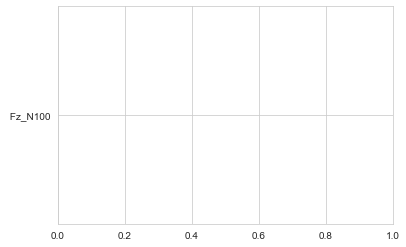

In [58]:
plt.scatter(x = ' age', y = ' Fz_N100', data = All_mean, s = 100, alpha = 0.05, edgecolor = 'white')
plt.title('Subject vs Age', fontsize = 16)
plt.ylabel('age', fontsize = 12)
plt.xlabel('Subject', fontsize = 12)

ValueError: x and y must be the same size

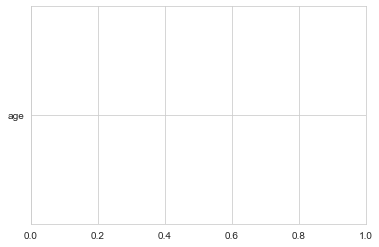

In [ ]:
plt.scatter(x = 'subject', y = 'trial', data = mergedTrialData_averaged_df.merge, s = 24000, alpha = 0.5, edgecolor = 'white')
plt.title('Subject vs Trial', fontsize = 16)
plt.ylabel('Trial', fontsize = 12)
plt.xlabel('Subject', fontsize = 12)

In [ ]:
plt.scatter(x = 'subject', y = 'trial', data = All_mean, s = 24000, alpha = 0.5, edgecolor = 'white')
plt.title('Subject vs Trial', fontsize = 16)
plt.ylabel('Trial', fontsize = 12)
plt.xlabel('Subject', fontsize = 12)

In [ ]:
plt.scatter(x = 'subject', y = 'Fz_N100', data = All_mean, s = 24000, alpha = 0.5, edgecolor = 'white')
plt.title('Subject vs Trial', fontsize = 16)
plt.ylabel('Trial', fontsize = 12)
plt.xlabel('Subject', fontsize = 12)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [59]:
slr = LinearRegression(copy_X = True)

slr.fit(All_mean)
print(slr.coef_)
print(slr.intercept_)

TypeError: fit() missing 1 required positional argument: 'y'

In [ ]:

X_train, Xtest, y_train, y_test= train_test_split(X,y)

lr = LinearRegression()
lr.fit(X_train, y_train)
merge= lr.predict(X_train, Xtest, y_train, y_test)

In [ ]:
lr.fit(mergedTrialData_averaged_df.merge)

In [ ]:
condition_1_df = mergedTrialData_df[mergedTrialData_df.condition == 1]
condition_1_averaged_df = condition_1_df.groupby('subject').mean()
condition_1_averaged_demo_df = condition_1_averaged_df.merge(demographics_df, on='subject').rename(columns={' group': 'group'})